# Oefening 1 dubbele integralen

Bereken het massamiddelpunt van de homogene vlakke schijf begrensd door de y-as, de parabool y=x^2 en de rechte y=x+2   


In [1]:
# importeer alles uit sympy
from sympy import *
%matplotlib notebook 

<IPython.core.display.Javascript object>


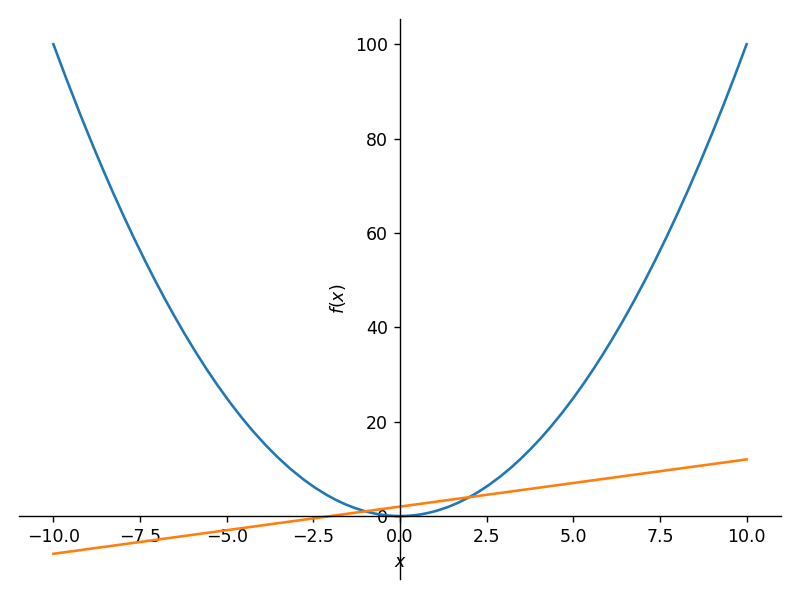

In [2]:
x,y,sigma = symbols('x y sigma')

# Plot de begrensde functies
f1 = x**2
f2 = x+2

plot(f1,f2)

In [3]:
# zoek het snijpunt
snijpunt = solve(f1-f2)
snijpunt

[-1, 2]

In [4]:
# De oppervlaktedichtheid is in dit vraagstuk constant en wordt voorgesteld door het symbool "Griekse letter sigma". 
# Als deze dichtheid niet constant zou zijn moet hier expliciet de uitdrukking voor de functie ingegeven worden! 

M = Integral(sigma,(y,x**2,x+2),(x,0,2))

# Merk op dat de grenzen voor de veranderlijke waarnaar je eerst integreert in "Integral" ook eerst MOETEN staan. 

M

Integral(sigma, (y, x**2, x + 2), (x, 0, 2))

In [5]:
# los integraal op
M.doit()

10*sigma/3

In [6]:
# bepaal x-coordinaat massamiddelpunt
Xm = (1/M)*Integral(x*sigma,(y,x**2,x+2),(x,0,2))
Xm

Integral(sigma*x, (y, x**2, x + 2), (x, 0, 2))/Integral(sigma, (y, x**2, x + 2), (x, 0, 2))

In [7]:
Xm.doit()

4/5

In [8]:
# bepaal y-coordinaat massamiddelpunt
Ym = (1/M)*Integral(y*sigma,(y,x**2,x+2),(x,0,2))
Ym

Integral(sigma*y, (y, x**2, x + 2), (x, 0, 2))/Integral(sigma, (y, x**2, x + 2), (x, 0, 2))

In [9]:
Ym.doit()

46/25

# Oefening 2 dubbele integralen

Maak voor deze oefening gebruik van Jupyter!
Beschouw de functie $$ f\left(x,y\right)=x\left(\sin{\left(y+1\right)}\right)^2+2\pi $$
Teken de grafiek van deze functie voor de x en y waarden tussen 0 en 10

Integreer de functie over het (x,y)-gebied ingesloten tussen:
de y-as, de kromme beschreven door $$ h\left(x\right)=\frac{x^2}{10} $$ en de kromme beschreven door $$ g\left(x\right)=8\left(\cos{\left(\frac{x}{5}\right)}\right)^2 met x\geq0\ $$


In [10]:
# importeer alles uit sympy
from sympy import *
from sympy.plotting import plot3d
%matplotlib notebook 

In [11]:
x,y = symbols('x y')
f = x*(sin(y+1))**2+2*pi
f

x*sin(y + 1)**2 + 2*pi

In [12]:
h = x**2/10
h

x**2/10

In [13]:
g = 8*(cos(x/5))**2
g

8*cos(x/5)**2

<IPython.core.display.Javascript object>


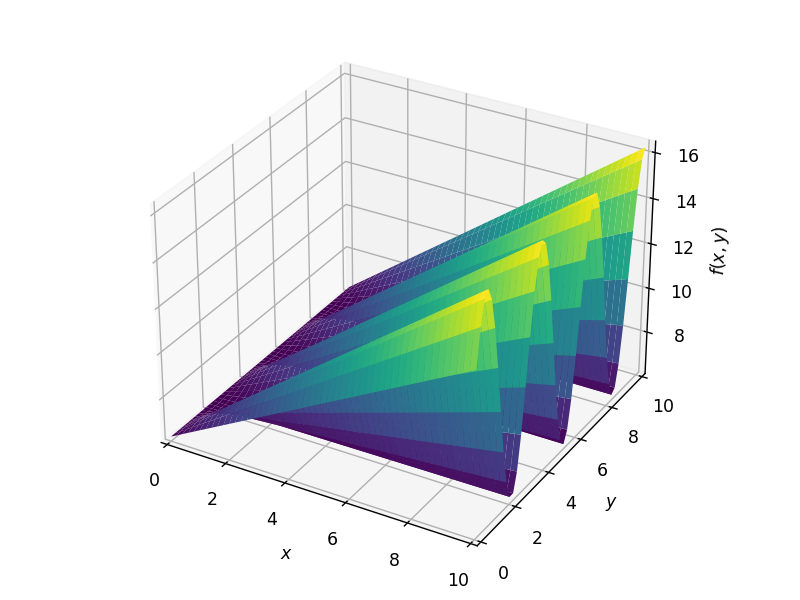

In [14]:
# Teken f(x,y) voor x en y 0-10
plot3d(f,(x,0,10),(y,0,10))


<IPython.core.display.Javascript object>


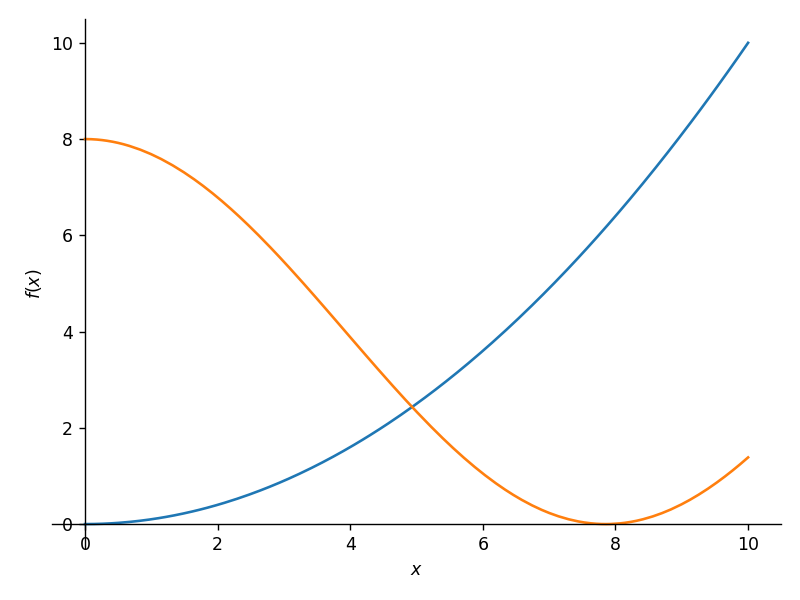

In [15]:
# Teken de begrenzende functies
plot(h,g,(x,0,10))

In [16]:
# zoek het snijpunt
snijpunt = solve(h-g)
snijpunt

NotImplementedError: multiple generators [x, cos(x/5)]
No algorithms are implemented to solve equation x**2/10 - 8*cos(x/5)**2

## Error
Dit geeft een error, sympy heeft het lastig met het feit dat er meerdere oplossingen zijn. We zullen daarom gebruik maken van het commando "nsolve". Dit zal een numerieke oplossing zoeken. Hierbij is het de bedoeling dat we een "gok" meegeven van waar we ongeveer het snijpunt verwachten. Door naar de plot te kijken, zien we dat het snijpunt in de buurt van x=4 ligt.

In [17]:
snijpunt = nsolve(h-g,4)
snijpunt

4.93301078601590

We moeten dus integreren voor x = 0 tot x=4.93
De grenzen voor y zijn dan (zie figuur) y = h(x) tot y = g(x)

We bepalen dus volgende integraal

In [18]:
integraal = Integral(f,(y,h,g),(x,0,snijpunt))
integraal

Integral(x*sin(y + 1)**2 + 2*pi, (y, x**2/10, 8*cos(x/5)**2), (x, 0, 4.9330107860159))

Het berekenen van deze integraal via .doit() duurt héél lang, ook het opsplitsen helpt niet

In [19]:
#integraal.doit()
int1 = Integral(f,(y,h,g))
int1 = int1.doit()
int1 = simplify(int1)
int1

-x**3/20 - pi*x**2/5 + x*sin(x**2/5 + 2)/4 - x*sin(16*cos(x/5)**2 + 2)/4 + 4*x*cos(x/5)**2 + 16*pi*cos(x/5)**2

In [20]:
int2 = Integral(int1,(x,0,snijpunt))
int2

Integral(-x**3/20 - pi*x**2/5 + x*sin(x**2/5 + 2)/4 - x*sin(16*cos(x/5)**2 + 2)/4 + 4*x*cos(x/5)**2 + 16*pi*cos(x/5)**2, (x, 0, 4.9330107860159))

In [21]:
int2.doit()

KeyboardInterrupt: 

Het lukt dus niet om deze integraal symbolisch te berekenen. 
Als het heel lang duurt om een uitkomst te bekomen kan je de berekening altijd onderbreken met de stopknop bovenaan
(naast "uitvoeren")?

Het is echter wel mogelijk een dergelijke integraal numeriek te berekenen door gebruik te maken van de bibliotheek SciPy.
Zie de algemene Notebooks. 

In [22]:
import numpy as np
from scipy.integrate import dblquad

def integrand(y, x):
    return x * np.sin(y + 1)**2 + 2 * np.pi

x_lower = 0
x_upper = snijpunt

y_lower = lambda x: x**2 / 10
y_upper = lambda x: 8 * (np.cos(x / 5))**2

integraal = dblquad(integrand, x_lower, x_upper, y_lower, y_upper)
integraal 

(177.85953704073106, 7.737153423768799e-07)

De output geeft eerst de uitkomst van de numerieke berekening (dit is ALTIJD een benadering).
Het tweede getal is een schatting van de nauwkeurigheid van de berekening (hier dus van de orde $8.10^{-7}$).